In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [2]:
%run DMD_functions.ipynb 

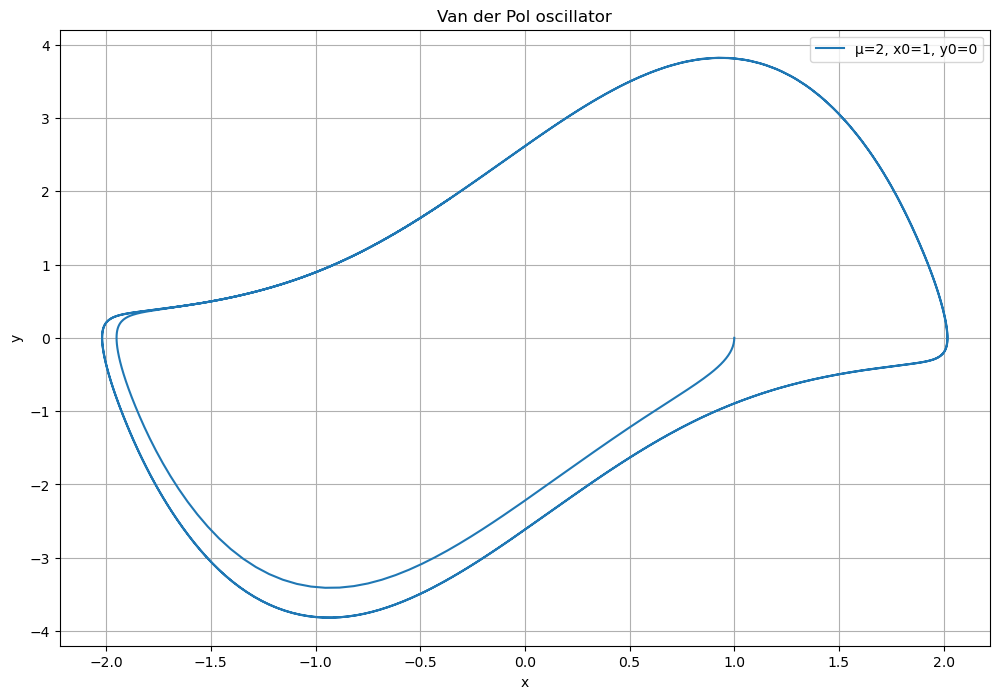

In [3]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = 2
t_span=(0,20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]


sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(12, 8))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



(2, 1000)


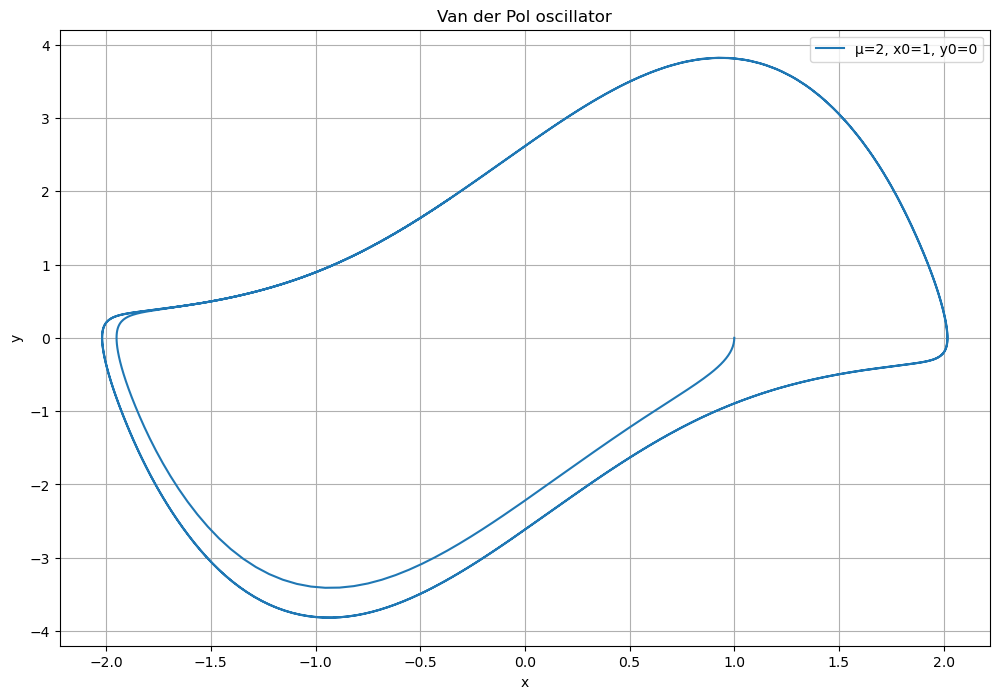

In [4]:
vdp = sol.y
print(vdp.shape)

plt.figure(figsize=(12, 8))
plt.plot(vdp[0,:], vdp[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

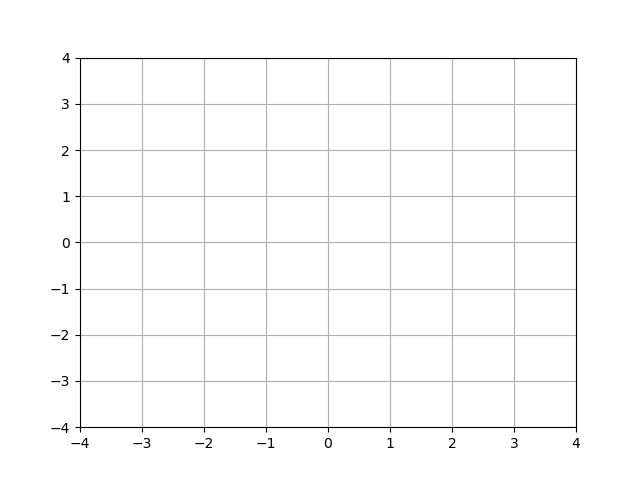

In [5]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,0], vdp[1,0], lw=2)[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,:frame]
    y = vdp[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=5, blit=True, repeat=False)
plt.show()

Ako ih ne "stackam" uvijek ću dobiti max dva moda (nakon svd-a,...)

In [71]:
vdp=sol.y
num_stack = 20
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [73]:
#provjera jel dobro formirana matrica..

k=np.random.randint(num_stack, m)
for i in range(1,num_stack):
    if(np.all(vdp[:2,k]==vdp[2*i:2*i+2,k-i])):
        print(True)
    else:
        print(False, vdp[:2,k],vdp[2*i:2*i+2,k-i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [74]:
m=vdp.shape[1]-1

Z, L = DMD(vdp[:,:m], vdp[:,1:(m+1)])
print(L.shape)

(40,)


In [75]:
Z, L, r, _, _ = GEDMDQ(vdp[:,:m+1])
print(L.shape)

(40,)


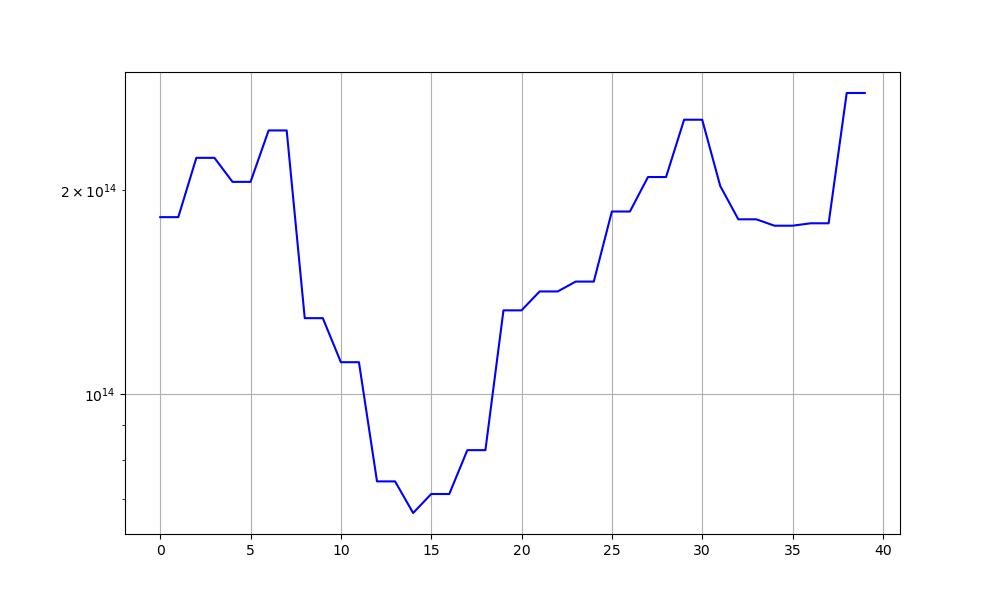

In [76]:

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [77]:
threshold = 1e-14
indices = np.where(r<threshold)[0]
print(indices, indices.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39] (33,)


In [78]:
times = [i for i in range(m-100,m+100)]

reconstructed = DMD_reconstruction(vdp[:,:1], Z, indices, L, times)

#lose!!!! 

**uzimamo dio oscilatora - iz toga procjena za dalje**


.

In [92]:
poc=700; zav=800; rec=50

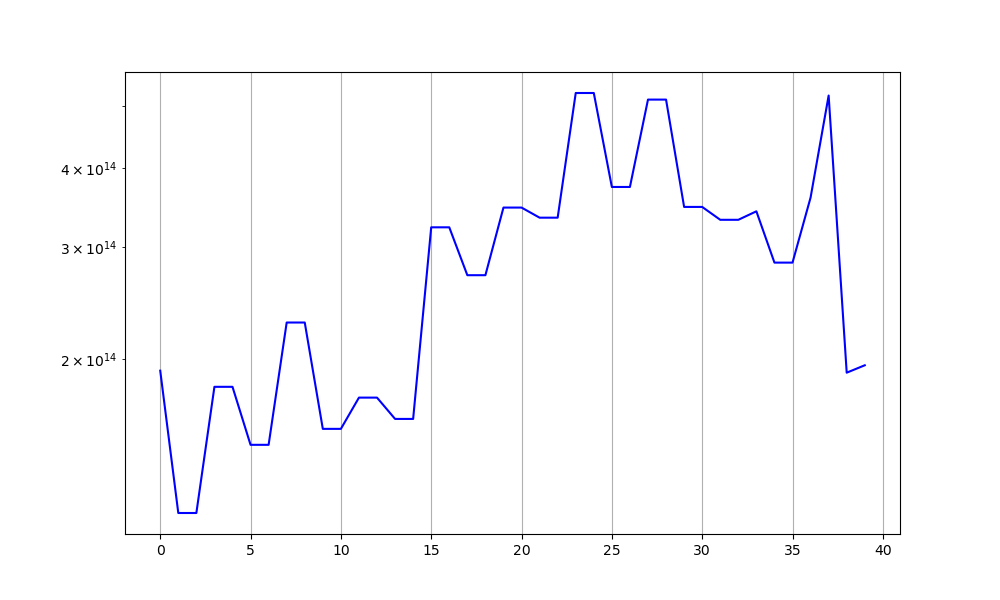

In [93]:
Z, L, r, _, _ = GEDMDQ(vdp[:,poc:zav])

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [94]:
threshold=1e-14
indices=np.where(r<threshold)[0]
indices.shape

(40,)

In [95]:
reconstructed = DMD_reconstruction(vdp[:,poc:zav], Z, indices, L, [i for i in range(zav-poc+rec)])

C:\Users\dimotela\AppData\Local\Temp\ipykernel_7384\3005076763.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.53972e-18): result may not be accurate.
  alpha = scipy.linalg.solve(alpha, np.multiply(np.conj(pom),(np.conj(R.T)@G*weights))@np.ones((m, 1)), assume_a='pos')


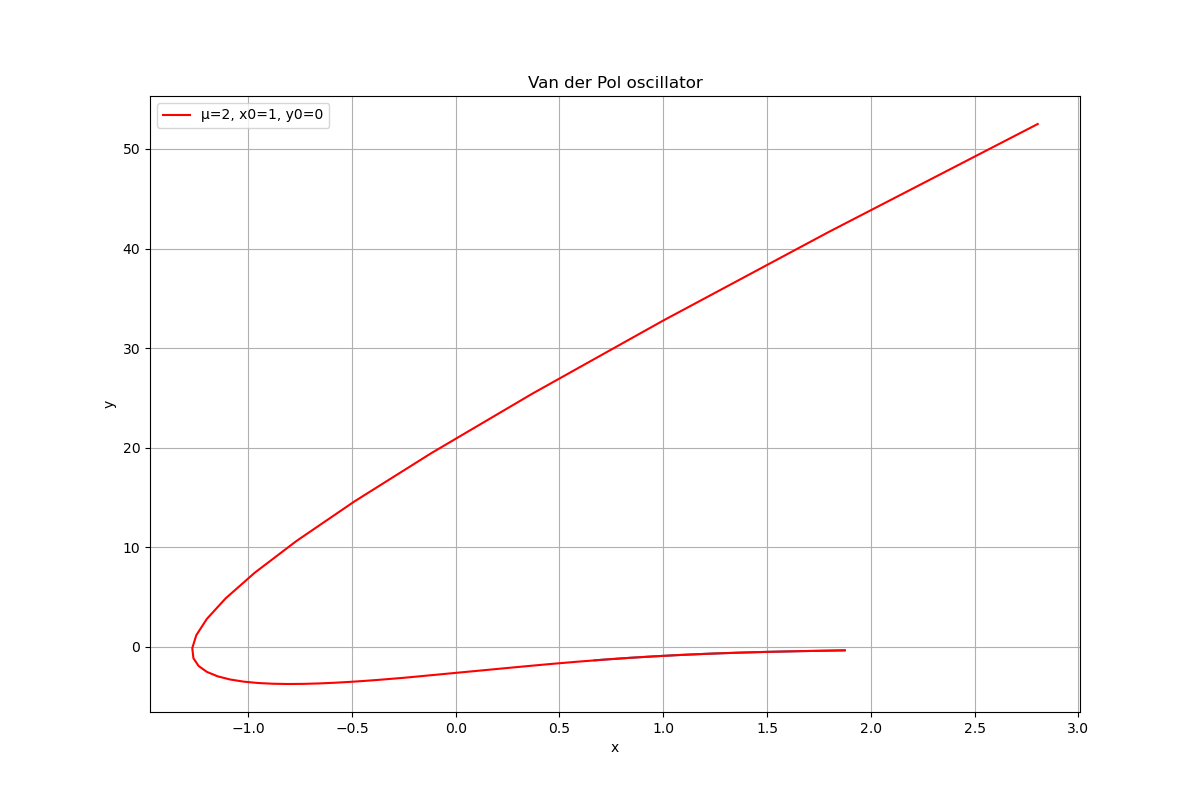

In [96]:
plt.figure(figsize=(12, 8))
plt.plot(vdp[0,poc:zav], vdp[1,poc:zav])
plt.plot(reconstructed[0,:], reconstructed[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

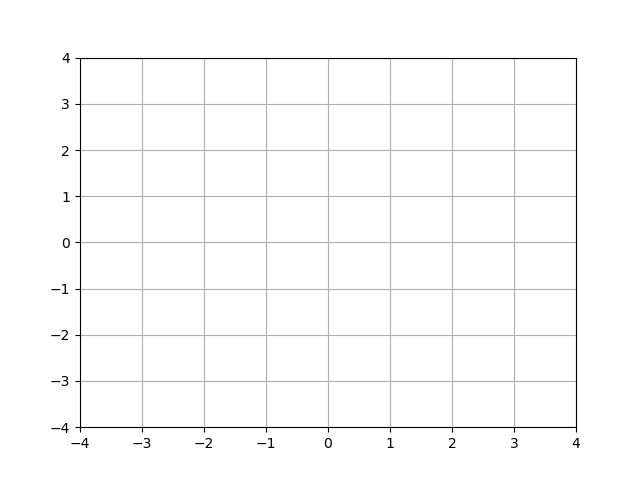

In [97]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,poc], vdp[1,poc], lw=2, color="blue")[0]
line1 = ax.plot(reconstructed[0,0], reconstructed[1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,poc:(poc+frame)]
    y = vdp[1,poc:(poc+frame)]
    x_r = reconstructed[0,:frame]
    y_r = reconstructed[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=zav-poc+rec, interval=100, blit=True, repeat=False)
plt.show()